In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'Daily Household Transactions.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format with specified format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Convert 'Amount' column to numeric, coercing errors
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Drop rows with missing 'Amount' or 'Date' as they are critical for analysis
data = data.dropna(subset=['Amount', 'Date'])

# Filter out only expense transactions
data = data[data['Income/Expense'] == 'Expense']
data

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
5,2018-09-15 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR
...,...,...,...,...,...,...,...,...
2416,2015-01-14 23:38:24,Cash,Food,NaN,3 bananas,13.0,Expense,INR
2417,2015-01-14 15:35:57,Cash,Food,NaN,Lunch - chicken fried rice + chicken soup,120.0,Expense,INR
2418,2015-01-14 12:42:56,Saving Bank account 1,Transportation,NaN,travels - Mumbai to brc,760.0,Expense,INR
2419,2015-01-13 18:52:47,Cash,Other,NaN,Internet renewal,500.0,Expense,INR


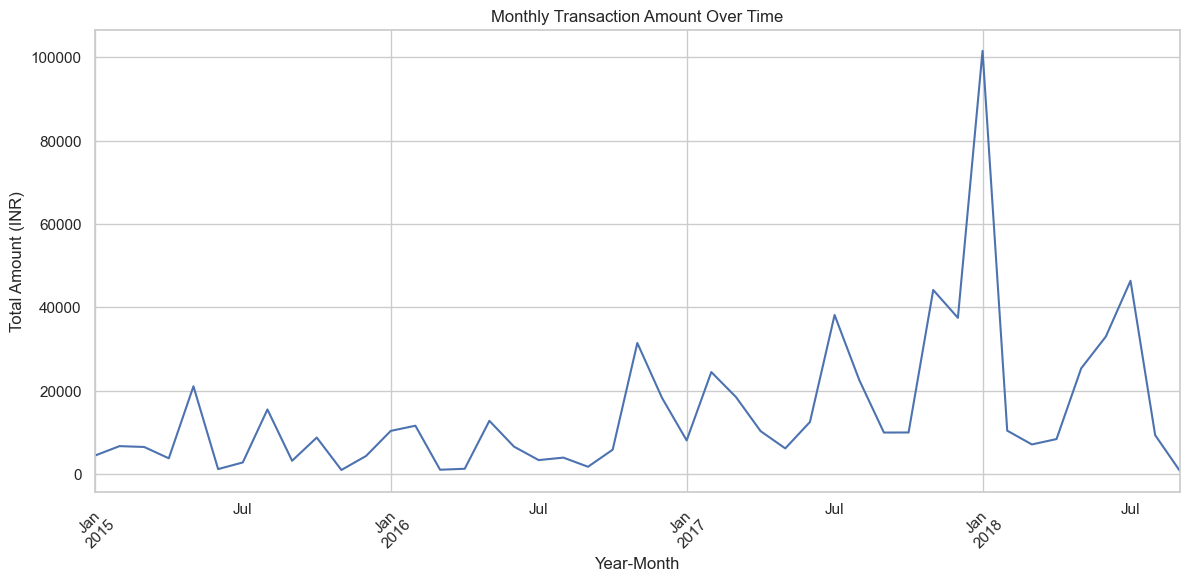

C:\Users\delll\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


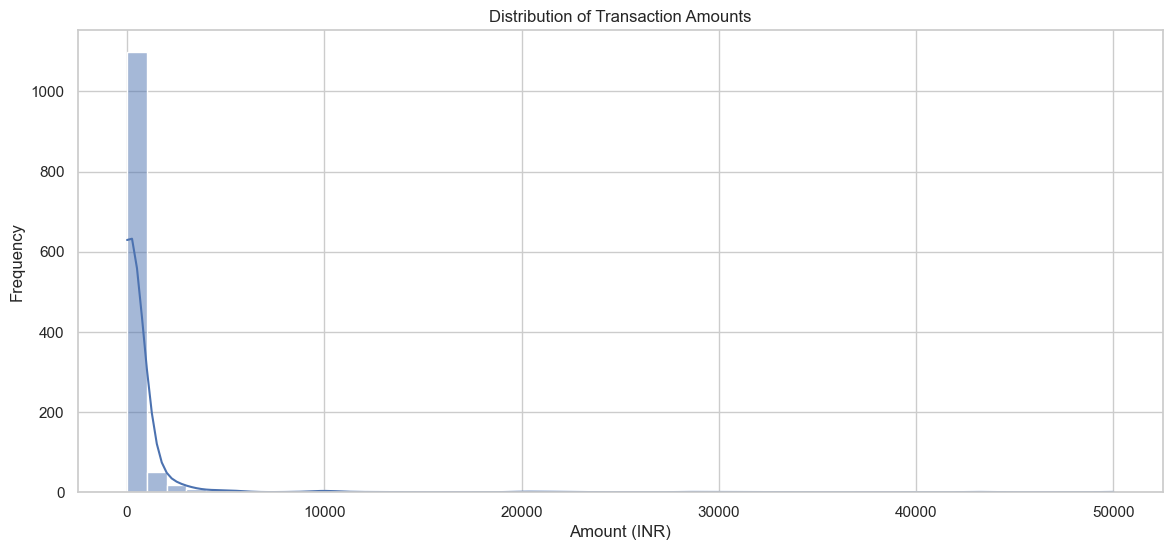

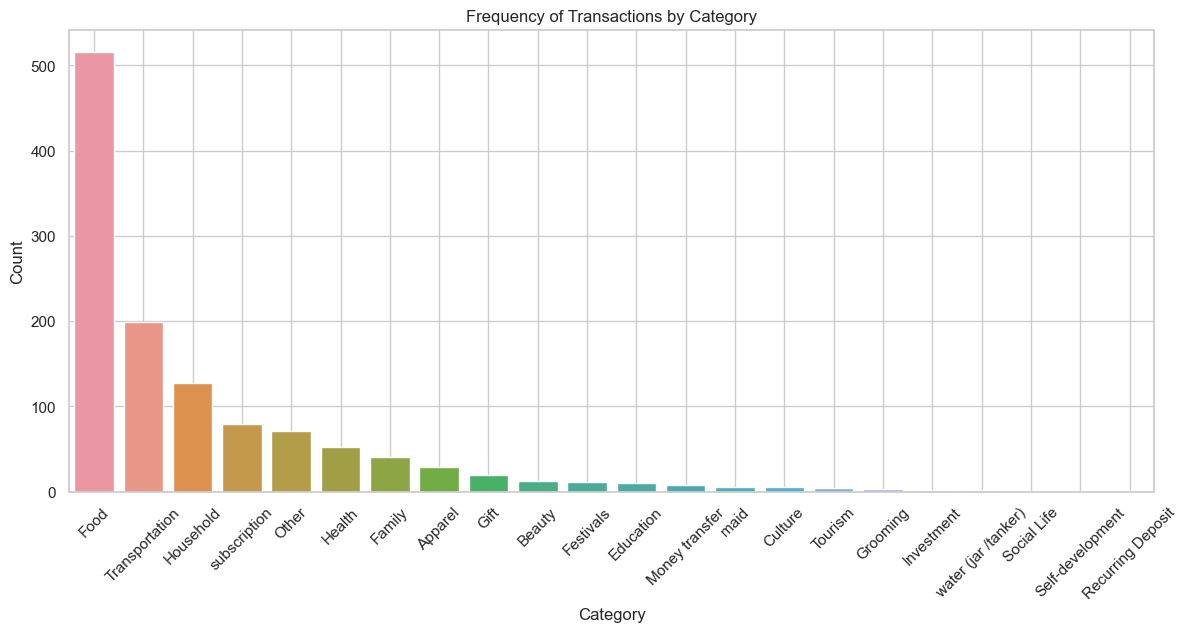

In [17]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Extract year and month from the Date for trend analysis
data['YearMonth'] = data['Date'].dt.to_period('M')

# Plot transaction trends over time
plt.figure(figsize=(14, 6))
transaction_trend = data.groupby('YearMonth')['Amount'].sum()
transaction_trend.plot(kind='line')
plt.title('Monthly Transaction Amount Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the distribution of transaction amounts
plt.figure(figsize=(14, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the frequency of transactions by category
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.title('Frequency of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [20]:
# Select relevant features for clustering
features = ['Amount']
data_for_clustering = data[features]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

clusters


C:\Users\delll\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:,0]
data['PCA2'] = data_pca[:,1]



ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [25]:
 # Visualize the resulting clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Purchasing Behavior')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

ValueError: Could not interpret value `PCA1` for parameter `x`

<Figure size 1400x600 with 0 Axes>

In [14]:
# Use PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Visualize the resulting clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Purchasing Behavior')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [14]:
# Use PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Visualize the resulting clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Purchasing Behavior')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [14]:
# Use PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Visualize the resulting clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Purchasing Behavior')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [14]:
# Use PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Visualize the resulting clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Purchasing Behavior')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [14]:
# Use PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Visualize the resulting clusters
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Purchasing Behavior')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'